In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

#sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [ ]:
columns = ['x-axis', 'y-axis','z-axis','xg-axis', 'yg-axis','zg-axis','activity']
df=pd.read_csv("Act1_noise2.csv",names=columns,skiprows=1)


In [3]:
df

,x-axis,y-axis,z-axis,xg-axis,yg-axis,zg-axis,activity
0,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,1
1,0.0934,-0.1225,0.7399,37.8049,-152.7439,-26.8902,1
2,0.1689,-0.0379,0.9245,45.0610,-147.9878,-25.7317,1
3,0.2049,0.0226,1.0523,53.5366,-134.3902,-27.1341,1
4,0.2417,0.0170,1.1290,53.2317,-117.6829,-25.9146,1
5,0.2606,0.0150,1.1777,48.8415,-99.8171,-22.4390,1
6,0.2338,0.0209,1.2001,44.4512,-82.0122,-20.9146,1
7,0.1693,0.0090,1.1554,38.3537,-68.8415,-20.9756,1
8,0.1021,-0.0305,1.0869,29.7561,-64.6341,-20.0000,1
9,0.0847,-0.0479,1.0269,23.1707,-69.6951,-17.9268,1


In [4]:
tf.__version__

'1.14.0'

In [5]:
df.shape

(61207, 7)

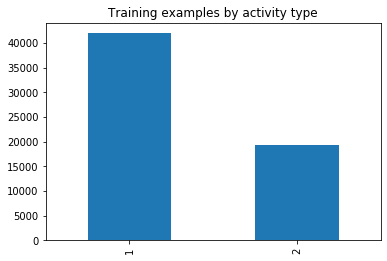

In [6]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [7]:
N_TIME_STEPS = 500
N_FEATURES = 6
step = 100
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    xsg = df['xg-axis'].values[i: i + N_TIME_STEPS]
    ysg = df['yg-axis'].values[i: i + N_TIME_STEPS]
    zsg = df['zg-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    #print label
    segments.append([xs, ys, zs, xsg, ysg, zsg])
    labels.append(label)
    #print labels

In [8]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [9]:
reshaped_segments.shape

(608, 500, 6)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [11]:
X_train.shape

(486, 500, 6)

In [12]:
X_test.shape

(122, 500, 6)

In [13]:
N_CLASSES = 2
N_HIDDEN_UNITS = 64

In [14]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden =tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [15]:
#tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [16]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [18]:
LEARNING_RATE = 0.00015
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [19]:
N_EPOCHS = 40
BATCH_SIZE = 128

In [20]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)
    #if i != 1 and i % 10 != 0:
        #continue

    print("epoch " + str(i) + ":  "+ "test accuracy:" + " " + str(acc_test) + " " + "loss:" + str(loss_test))
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

#print()
print("final results: accuracy:   " + str(acc_final) + "\t" +  "loss:  " +str(loss_final))

epoch 1:  test accuracy: 0.6393443 loss:1.4533005
epoch 2:  test accuracy: 0.6803279 loss:1.4309287
epoch 3:  test accuracy: 0.6967213 loss:1.4129279
epoch 4:  test accuracy: 0.704918 loss:1.4060963
epoch 5:  test accuracy: 0.6967213 loss:1.4011945
epoch 6:  test accuracy: 0.704918 loss:1.3931943
epoch 7:  test accuracy: 0.71311474 loss:1.378313
epoch 8:  test accuracy: 0.71311474 loss:1.3684156
epoch 9:  test accuracy: 0.72131145 loss:1.3725986
epoch 10:  test accuracy: 0.7295082 loss:1.3694189
epoch 11:  test accuracy: 0.7295082 loss:1.364927
epoch 12:  test accuracy: 0.72131145 loss:1.361134
epoch 13:  test accuracy: 0.72131145 loss:1.3571446
epoch 14:  test accuracy: 0.72131145 loss:1.3540727
epoch 15:  test accuracy: 0.7295082 loss:1.3534076
epoch 16:  test accuracy: 0.7295082 loss:1.3543253
epoch 17:  test accuracy: 0.7295082 loss:1.3494593
epoch 18:  test accuracy: 0.71311474 loss:1.3450447
epoch 19:  test accuracy: 0.72131145 loss:1.3425462
epoch 20:  test accuracy: 0.7295082 l

In [24]:
pickle.dump(predictions, open("predictions_task1.p", "wb"))
pickle.dump(history, open("history_task1.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/activity_task1.pbtxt')  
saver.save(sess, save_path = "./checkpoint/activity_tesk1.ckpt")
#sess.close()

RuntimeError: Attempted to use a closed Session.

In [22]:
history = pickle.load(open("history_task1.p", "rb"))
predictions = pickle.load(open("predictions_task1.p", "rb"))

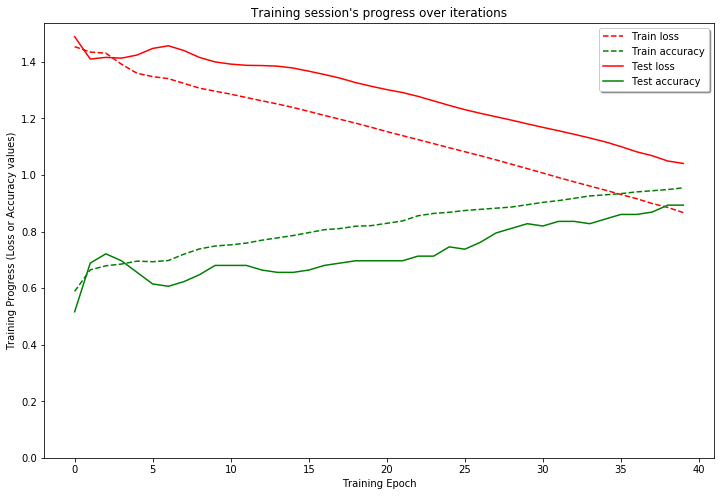

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [24]:
#activity
LABELS = [1,2]

In [32]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [26]:
#max_test = np.argmax(y_test, axis=1)
#ls = list(max_test)
#ls


In [33]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

max_test1 = max_test.tolist()
print (max_test1)
print (type(max_test1))
max_predictions1 = max_predictions.tolist()
print(max_predictions1)

confusion_matrix(max_test1, max_predictions1)


[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
<class 'list'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


array([[88,  3],
       [ 9, 22]])

In [34]:
def data_reshaping(df):
    #df['activity'].value_counts().plot(kind='bar', title='Testing examples by activity type');
    N_TIME_STEPS = 500
    N_FEATURES = 6
    step = 100
    segments = []
    test_labels = []
    for i in range(0, len(df) - N_TIME_STEPS, step):
        xs = df['x-axis'].values[i: i + N_TIME_STEPS]
        ys = df['y-axis'].values[i: i + N_TIME_STEPS]
        zs = df['z-axis'].values[i: i + N_TIME_STEPS]
        xsg = df['xg-axis'].values[i: i + N_TIME_STEPS]
        ysg = df['yg-axis'].values[i: i + N_TIME_STEPS]
        zsg = df['zg-axis'].values[i: i + N_TIME_STEPS]
        
        label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([xs, ys, zs, xsg, ysg,zsg])
        test_labels.append(label)
    #print test_labels
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
    #test_labels = np.asarray(pd.get_dummies(test_labels), dtype = np.float32)
    #X_train, X_test, y_train, y_test = train_test_split(
        #reshaped_segments, test_labels, test_size=0.99, random_state=RANDOM_SEED)
    X_test = reshaped_segments
    y_test = test_labels
    
    #print test_labels
    return X_test, y_test
    

In [37]:
columns1=['ep','x-axis', 'y-axis' ,'z-axis' ,'xg-axis' ,'yg-axis' ,'zg-axis']
test = pd.read_csv('Sub_Act1.csv', header = None, names = columns1)
test

,ep,x-axis,y-axis,z-axis,xg-axis,yg-axis,zg-axis
0,1.574147e+12,0.1374,-0.0399,0.0553,-4.3902,-6.6463,1.0976
1,1.574147e+12,0.1409,-0.0436,0.0517,-4.5122,-2.1951,1.7683
2,1.574147e+12,0.1329,-0.0477,0.0536,-3.3537,3.2317,3.2317
3,1.574147e+12,0.1254,-0.0538,0.0540,1.2195,4.5122,4.1463
4,1.574147e+12,0.1177,-0.0572,0.0521,4.3902,-2.1951,3.9024
5,1.574147e+12,0.1100,-0.0552,0.0554,6.7683,-20.8537,4.8780
6,1.574147e+12,0.1099,-0.0564,0.0586,6.5854,-45.6707,6.7683
7,1.574147e+12,0.1133,-0.0646,0.0535,3.0488,-67.9268,8.1707
8,1.574147e+12,0.1204,-0.0768,0.0488,1.2805,-84.5732,8.9024
9,1.574147e+12,0.1222,-0.0801,0.0367,2.7439,-96.3415,12.3780


In [39]:
test['activity']=1

In [38]:
x_test1, y_test1 = data_reshaping(test)

KeyError: 'activity'

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver = tf.train.import_meta_graph("./checkpoint/activity_tesk1.ckpt.meta")
    saver.restore(sess,tf.train.latest_checkpoint("./checkpoint"))
    predictions1= sess.run(pred_softmax, feed_dict={X: x_test1})
    #predictions, acc_final, loss_final = sess.run([pred_softmax, a, feed_dict={X: X_test1, Y: y_test1})
    sess.close()

In [ ]:
y_ls = list(y_test1)
print(y_ls)

In [ ]:
max_predictions1 = np.argmax(predictions1, axis=1) + 1
print(list(max_predictions1))

In [ ]:
columns = ['time','x-axis', 'y-axis','z-axis','xg-axis', 'yg-axis','zg-axis','activity']
df_time = pd.read_csv('test_raj_time.csv', header = None, names = columns)

In [ ]:
time = df_time['time']

In [ ]:
single_task_list = []

In [ ]:
pred_list = list(max_predictions1)
activity = []
temp = ['activity name','start time','End time','Accuracy']
activity.append(temp)

In [ ]:
i = 400
for items in pred_list:
    i+=100
    if len(single_task_list) == 6:
        if single_task_list.count(1) >= single_task_list.count(2):
            accuracy = single_task_list.count(1) *100 / 6
            ls = []
            ls.append(1)
            ls.append(time[i-500])
            ls.append(time[i])
            ls.append(accuracy)
            activity.append(ls)
        single_task_list =[]
    else:
        single_task_list.append(items)
        

In [ ]:
for items in activity:
    print (items)